<a href="https://colab.research.google.com/github/Giovasantoru/Credit-Score-Project/blob/main/Project_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")

<ipython-input-3-35e194ecfc1b>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/train.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.describe().T # summary information on the numeric columns

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


negative number for Num_Bank_account is not possible. The same could be said for Delay_from_due_date.

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
df = df.drop(['ID','Name','SSN', 'Month', 'Amount_invested_monthly', 'Type_of_Loan'], axis = 1)

In [ ]:
df.shape

(100000, 22)

In [ ]:
df.describe(include='object').T # summary information on the categorical columns

,count,unique,top,freq
Customer_ID,100000,12500,CUS_0xd40,8
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24
Credit_History_Age,90970,404,15 Years and 11 Months,446


We can see that the oldest client has 39 years old, and that the longest history age in 20 years and 1 month long. There is also a client with 19 delayed payment.
Age has 922 unique values, that indicates some anomalies in the data.

In [ ]:
df.Payment_of_Min_Amount.value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


The variable Payment of Min amounth indicates if a person has met the minimum payment amounth. **NM: for those entries, the information about whether the minimum amount was paid is missing or not specified.**


# **Data Cleaning**



1.   Check for duplicates and remove them if necessary.

2.   Verify the data types of each column and convert them if needed.
    
3.   Check for missing values and handle them appropriately.   





In [ ]:
df.duplicated().sum() #counting duplicates

0

There are no duplicates in the dataframe


In [ ]:
df.duplicated(subset='Customer_ID').sum() #counting duplicates

87500

In [ ]:
df['Customer_ID'].nunique() #checking for duplicates in Customer_ID

12500

Our dataset comprends 12500 unique customers

Now let's check for missing values

In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

It appears there are some missing values through the Non-null count. In particoular we have 50000 entries, but Credit_History_Age has only 45530 non-null values, also number of credit inquiries and number of delayed payment have some missing values.
In respect of the data types, we can notice that age, annual income, number of loans, number of delayed payments, outstanding debts, credit history age and monthly balance are classified as objects (strings), thus we need to change to the correct data type lately.



In [ ]:
df[['Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age']].isna().sum() #counting missing values for each column

,0
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030


We also noticed that some missing values are written as '_', so we need to transform them into actual NaN values in order to use Python functions related to missing values, such as isna(), fillna(), dropna(), and others for effective data cleaning and analysis.

In [ ]:
df = df.replace("_", "", regex=True) #replacing _ with empty string

In [ ]:
df[df.eq('').any(axis=1)] #checking for empty strings

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,,809.98,26.822620,22 Years and 1 Months,No,49.574949,HighspentSmallvaluepayments,312.49408867943663,Good
2,CUS0xd40,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,LowspentMediumvaluepayments,331.2098628537912,Good
8,CUS0x21b1,28,,34847.84,3037.986667,2,4,6,1,3,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,LowspentSmallvaluepayments,470.69062692529184,Standard
10,CUS0x21b1,28,Teacher,34847.84,3037.986667,2,1385,6,1,3,...,2.0,,605.03,33.224951,26 Years and 9 Months,No,18.816215,HighspentLargevaluepayments,466.46647639764313,Standard
16,CUS0x2dbc,34,,143162.64,12187.220000,1,5,8,3,5,...,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,!@9#%8,1043.3159778669492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,CUS0x8600,28,,20002.88,1929.906667,10,8,29,5,33,...,9.0,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,!@9#%8,307.659291,Standard
99992,CUS0x942c,24,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,,502.38,32.991333,31 Years and 3 Months,No,35.104023,LowspentSmallvaluepayments,189.64108,Poor
99994,CUS0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,,502.38,39.323569,31 Years and 5 Months,No,35.104023,HighspentMediumvaluepayments,410.256158,Poor
99995,CUS0x942c,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,,502.38,34.663572,31 Years and 6 Months,No,35.104023,HighspentLargevaluepayments,479.866228,Poor


In [ ]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [ ]:
# Fill empty values with np.nan for all blank values in the dataframe
df.replace('', np.nan, inplace=True)

In [ ]:
#Check for columns with missing values
df.columns[df.isna().any()]

Index(['Occupation', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_History_Age', 'Monthly_Balance'],
      dtype='object')

In [ ]:
# Checking if there are still columns with blank strings
blank_count = (df == '').sum().sum()

print(blank_count)


0


The blank values have been succesfully reolaced

In [ ]:
df.isna().sum() #counting missing values for each column

,0
Customer_ID,0
Age,0
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


As we have blak values for some entries, we check for both NA and blank values:

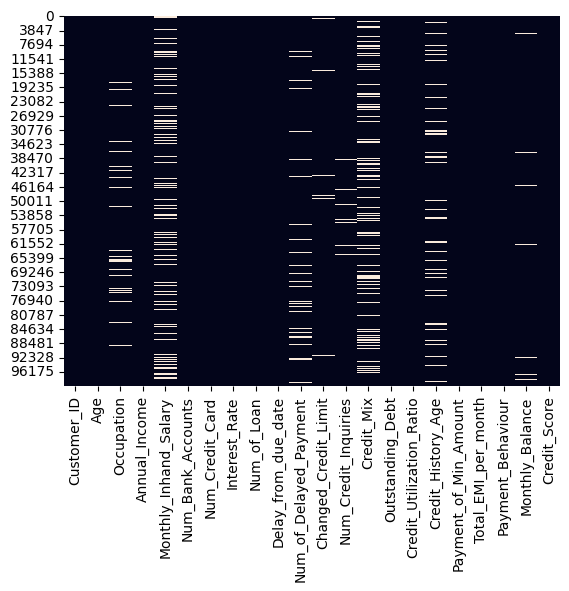

In [ ]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

The variables with the highest number of missing values are the credit history age, with 4470 missing values and Credit Mix with 9805.  

In [ ]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count() #counting negative values for Delay_from_due_date

591

In [ ]:
#dropping negative values for Delay from due date
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
print(df.shape)

(99409, 22)


In [ ]:
print(df[df['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].count()) #counting negative values for Num_Bank_Accounts
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
print(df.shape)

21
(99388, 22)


In [ ]:
df['Credit_Mix'].describe()

,Credit_Mix
count,79309
unique,3
top,Standard
freq,36479


In [ ]:
df['Age'].unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

We can notive a lot of high numbers, we should get rid of them.

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #converting to numeric

<Axes: xlabel='Age'>

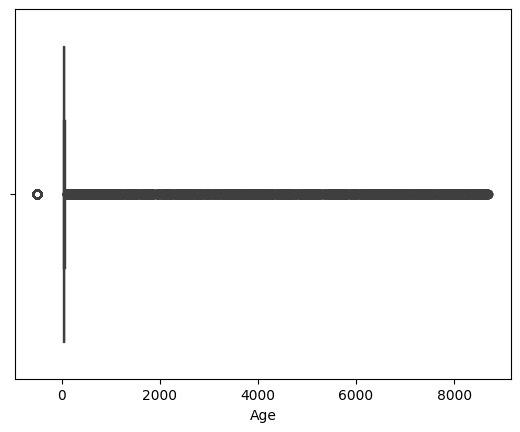

In [ ]:
sns.boxplot(data= df, x= df.Age) #visualize outliers

High presence of outliers with implausible age values.

In [ ]:
print(df['Age'].min())
df[df['Age'] < 0]['Age'].unique()

-500


array([-500])

There are 500 unique negative age values.

In [ ]:
df[df['Age'] > 100]['Age'].nunique() #checking for age greater than 100

1675

Also a lot of implausible high values, thus we replace these values with null values, in order to fill them with the age of the customer id reported in the other rows.

In [ ]:
# Replace invalid ages with NaN
df.loc[(df['Age'] > 100) | (df['Age'] < 0), 'Age'] = np.nan

# Fill NaN values with a down-up approach, resetting index to match df
df['Age'] = df.groupby('Customer_ID')['Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)
# The .reset_index(level=0, drop=True) part is crucial. It resets the index of the Series
# resulting from the groupby and apply operations, aligning it with the DataFrame df.
# The level=0 indicates the first level of the index (since groupby creates a multi-index),
# and drop=True removes the old index.

<ipython-input-36-8327d8b6ebfd>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df.groupby('Customer_ID')['Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


In [ ]:
print(df.shape)
print(df['Age'].nunique())

(99388, 22)
46


44 unique age values is a plausible number.

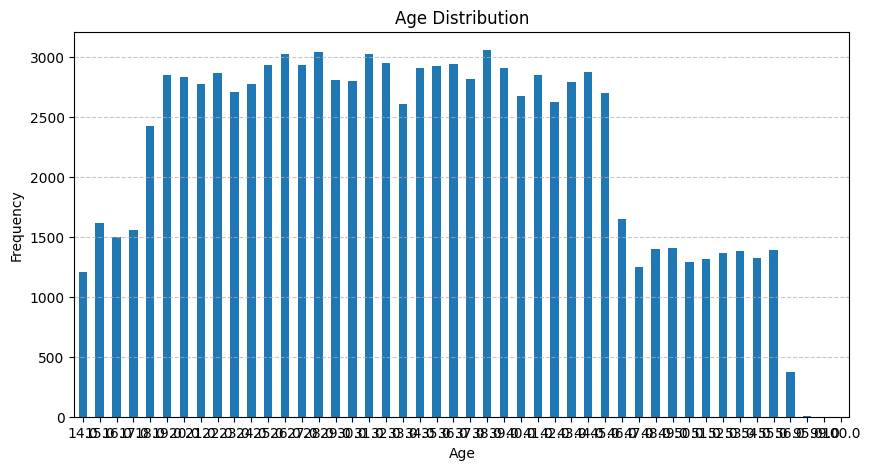

In [ ]:
age_counts = df['Age'].value_counts().sort_index()

# Plot the bar chart
age_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Most of the clients are between 20 and 45 years old.

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce') #converting to numeric
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [ ]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace = True) #dropping rows with negative values

In [ ]:
df.shape[0] #numer of rows only

98755

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float) #converting to float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98755 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               98755 non-null  object 
 1   Age                       98755 non-null  float64
 2   Occupation                91794 non-null  object 
 3   Annual_Income             98755 non-null  float64
 4   Monthly_Inhand_Salary     83950 non-null  float64
 5   Num_Bank_Accounts         98755 non-null  int64  
 6   Num_Credit_Card           98755 non-null  int64  
 7   Interest_Rate             98755 non-null  int64  
 8   Num_of_Loan               98755 non-null  object 
 9   Delay_from_due_date       98755 non-null  int64  
 10  Num_of_Delayed_Payment    91790 non-null  float64
 11  Changed_Credit_Limit      96691 non-null  object 
 12  Num_Credit_Inquiries      96818 non-null  float64
 13  Credit_Mix                78823 non-null  object 
 14  Outstanding

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique() #converting to numeric and checking if there are negative values

array([-100])

In [ ]:
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 10), 'Num_of_Loan'] = np.nan #replacing negative values with NaN

In [ ]:
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-46-4f119fdbe6d5>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


In [ ]:
df['Num_of_Loan'].describe()

,Num_of_Loan
count,98755.000000
mean,3.553471
std,2.449763
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


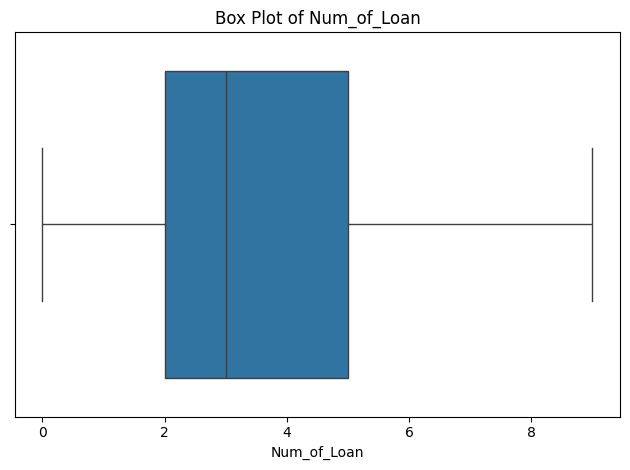

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x=df['Num_of_Loan'], ax=ax)
ax.set_title('Box Plot of Num_of_Loan')
ax.set_xlabel('Num_of_Loan')

plt.tight_layout()
plt.show()

In [ ]:
df.shape[0] #numer of rows only

98755

In [ ]:
df['Num_Credit_Card'].describe()

,Num_Credit_Card
count,98755.000000
mean,22.481809
std,129.021306
min,0.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,1499.000000


In [ ]:
df.loc[(df['Num_Credit_Card'] > 11), 'Num_Credit_Card'] = np.nan

df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-51-4d0f29cac692>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


Now we need to adjust the credit histoy age into a date type

In [ ]:
df['Credit_History_Age'].nunique() #checking unique values

404

In [ ]:
# Function to extract years and months
def extract_years_months(Credit_History_Age):
    import re
    # Handle non-string values
    if not isinstance(Credit_History_Age, str):
        return None, None
    match = re.match(r'(\d+) Years and (\d+) Months', Credit_History_Age)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years, months
    return None, None

# Apply the function to the column and create new columns
df[['Years', 'Months']] = df['Credit_History_Age'].apply(lambda x: pd.Series(extract_years_months(x)))

# Convert the total credit history age into months
df['Total_Months'] = df['Years'] * 12 + df['Months']


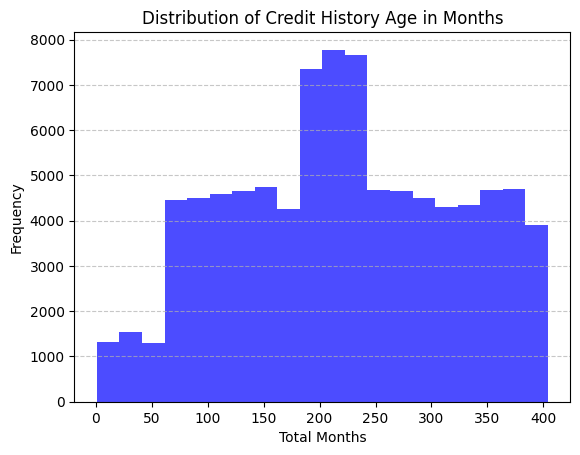

In [ ]:
# Plot using matplotlib
plt.hist(df['Total_Months'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Credit History Age in Months')
plt.xlabel('Total Months')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see from the distribution that the highest frequency is between 200 and 250 months

In [ ]:
df.dropna(subset=["Total_Months"], inplace=True)


In [ ]:
df.drop('Credit_History_Age', axis = 1, inplace = True) #dropping column as I already converted the values in months as float

Number Of Credit Inquiries

In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

1760

In [ ]:
df['Num_Credit_Inquiries'].describe()

,Num_Credit_Inquiries
count,88082.000000
mean,27.430837
std,190.926285
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,2594.000000


That looks like 2593.0 credit inquiries is not a plausible number for a typical individual. This number is extremely high and probably indicates an anomaly or error in the data. Let's see how many of these high values are in the dataset.

In [ ]:
df['Num_Credit_Inquiries'].tail(10)

,Num_Credit_Inquiries
99989,9.0
99991,9.0
99992,3.0
99993,3.0
99994,3.0
99995,3.0
99996,3.0
99997,3.0
99998,3.0
99999,3.0


The median is 7 inquiries, THE 3RD QUARTILE IS 10, the max value is clearly anomalous as the other tail values we have observed.

Let's check the ouliers using the Interquartile Range (IQR) method

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Display the number of outliers
num_outliers


1466

We have 722 outliers for the variable number of credit inquiries.

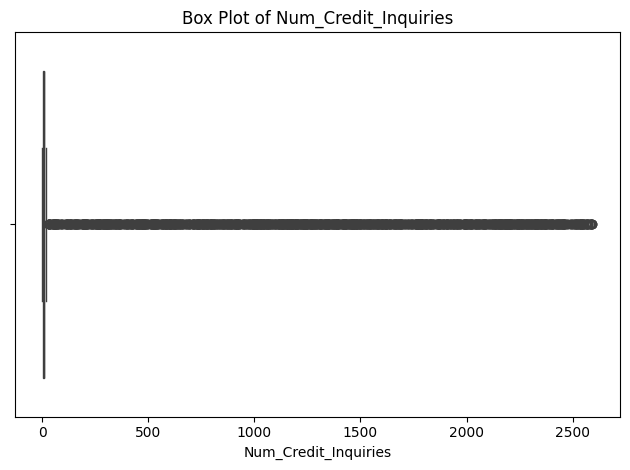

In [ ]:
fig, ax = plt.subplots() #creating a single subplot

sns.boxplot(x=df['Num_Credit_Inquiries'], ax=ax)
ax.set_title('Box Plot of Num_Credit_Inquiries')
ax.set_xlabel('Num_Credit_Inquiries')

plt.tight_layout()
plt.show()

Now we can clearly visualize the outliers, let's drop them.

In [ ]:
df.loc[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound), 'Num_Credit_Inquiries'] = np.nan
# Reset index after groupby to align with original DataFrame
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-62-62693642ffe2>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


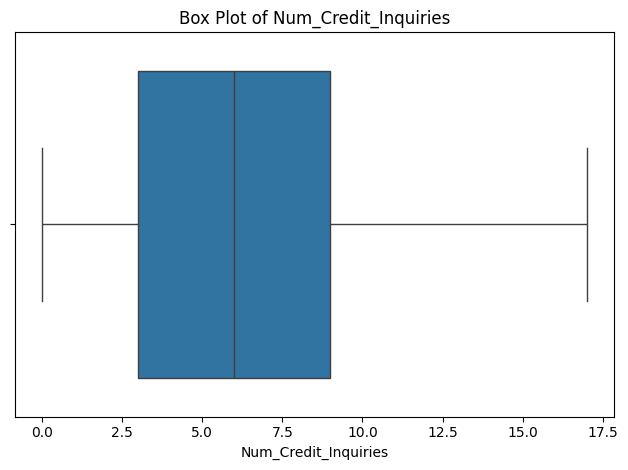

In [ ]:
fig, ax = plt.subplots() #creating a single subplot

sns.boxplot(x=df['Num_Credit_Inquiries'], ax=ax)
ax.set_title('Box Plot of Num_Credit_Inquiries')
ax.set_xlabel('Num_Credit_Inquiries')

plt.tight_layout()
plt.show()

In [ ]:
df['Num_Credit_Inquiries'].describe() #checking the summary stats

,Num_Credit_Inquiries
count,89842.000000
mean,5.820897
std,3.865487
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,17.000000


We can see that the distribution has now only plausible values, with a max value of 17 inquiries.

In [ ]:
df.shape[0]

89842

In [ ]:
df['Num_of_Delayed_Payment'].describe()

,Num_of_Delayed_Payment
count,83517.000000
mean,30.995390
std,225.269309
min,0.000000
25%,9.000000
50%,14.000000
75%,18.000000
max,4397.000000


<Axes: xlabel='Num_of_Delayed_Payment'>

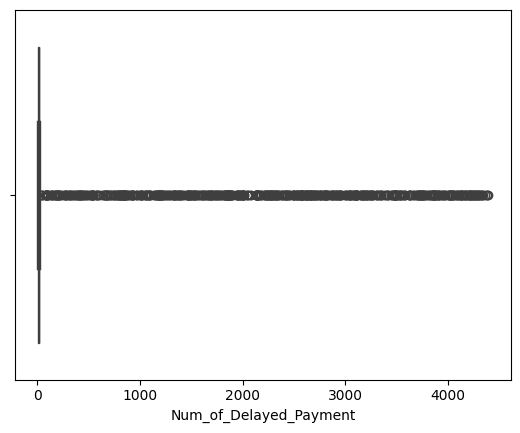

In [ ]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'])

In [ ]:
# IQR
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.drop(df[df['Num_of_Delayed_Payment'] > upper_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Num_of_Delayed_Payment'] < lower_bound].index, inplace = True)

<Axes: xlabel='Num_of_Delayed_Payment'>

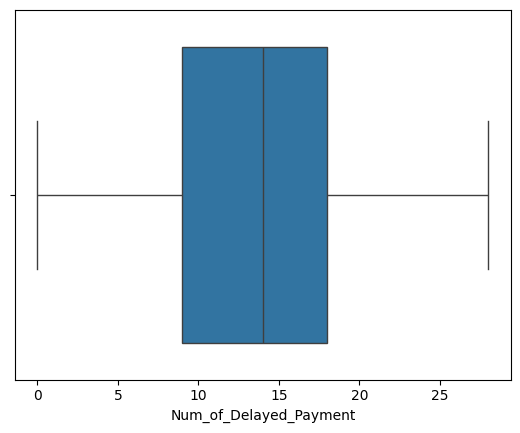

In [ ]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'])

In [ ]:
df.shape[0]

89181

# Monthly Balance



In [ ]:
df['Monthly_Balance'].describe()

,Monthly_Balance
count,88126
unique,88119
top,-333333333333333333333333333
freq,8


In [ ]:
df['Monthly_Balance'].isna().sum()

1055

In [ ]:
df['Monthly_Balance'].unique()  #checking unique values

array(['312.49408867943663', '331.2098628537912', '223.45130972736786',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [ ]:
#Converting the monthly balance into numeric type
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

<Axes: xlabel='Monthly_Balance'>

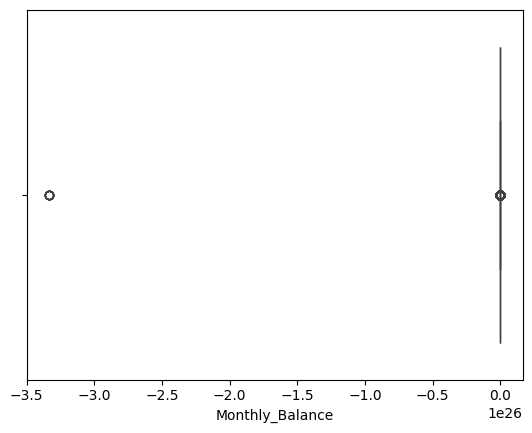

In [ ]:
sns.boxplot(data= df, x= df.Monthly_Balance) #visualize outliers

In [ ]:
df.shape[0]

89181

In [ ]:
#IQR
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.drop(df[df['Monthly_Balance'] < lower_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Monthly_Balance'] > upper_bound].index, inplace = True)

In [ ]:
df.shape[0]

82400

<Axes: xlabel='Monthly_Balance'>

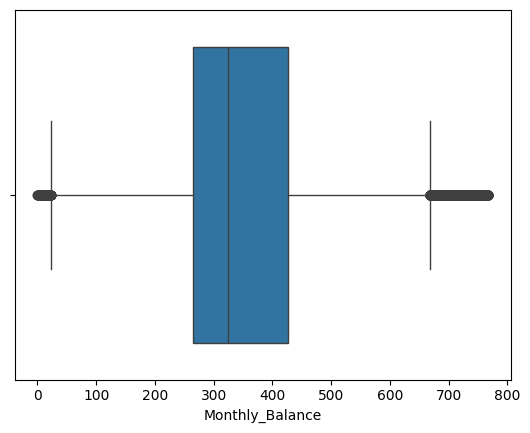

In [ ]:
sns.boxplot(data= df, x= df.Monthly_Balance) #visualize outliers

In [ ]:
df['Total_EMI_per_month'].describe(include='object')

,Total_EMI_per_month
count,82400.000000
mean,1413.026298
std,8333.733696
min,0.000000
25%,30.928164
50%,67.972795
75%,156.055359
max,82331.000000


<Axes: xlabel='Total_EMI_per_month'>

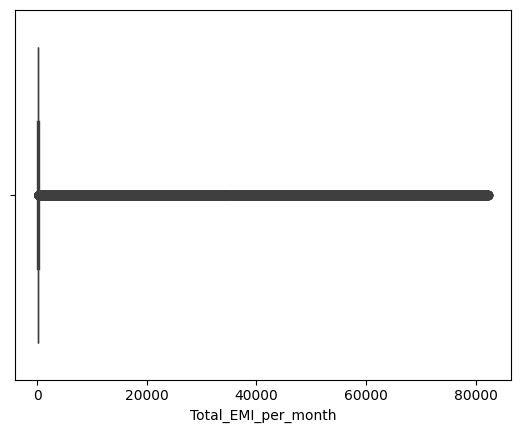

In [ ]:
sns.boxplot(data= df, x= df.Total_EMI_per_month) #visualize outliers

In [ ]:
#IQR
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.drop(df[df['Total_EMI_per_month'] < lower_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Total_EMI_per_month'] > upper_bound].index, inplace = True)

<Axes: xlabel='Total_EMI_per_month'>

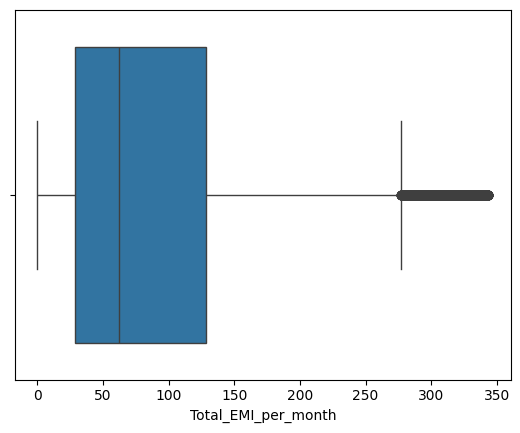

In [ ]:
sns.boxplot(data= df, x= df.Total_EMI_per_month)

# **Now let's check the categorical variables**


In [ ]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,21574
HighspentMediumvaluepayments,12895
LowspentMediumvaluepayments,10963
HighspentSmallvaluepayments,9032
LowspentLargevaluepayments,8436
HighspentLargevaluepayments,7786
!@9#%8,5812


Let's sobstitute "!@9#%8" with the mode value of the distribution

In [ ]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

As the Payment behaviour is less predictable and can vary from month to month indepently by the variables we have at disposition in our dataset, I'll drop the null values directly.

In [ ]:
df.dropna(subset=["Payment_Behaviour"], inplace=True) #dropping missing values

In [ ]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,21574
HighspentMediumvaluepayments,12895
LowspentMediumvaluepayments,10963
HighspentSmallvaluepayments,9032
LowspentLargevaluepayments,8436
HighspentLargevaluepayments,7786


In [ ]:
df.drop(['Years', 'Months'], axis = 1, inplace = True) #dropping unnecessary columns

In [ ]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
df["Changed_Credit_Limit"].fillna(df["Changed_Credit_Limit"].mean(), inplace=True)

<Axes: >

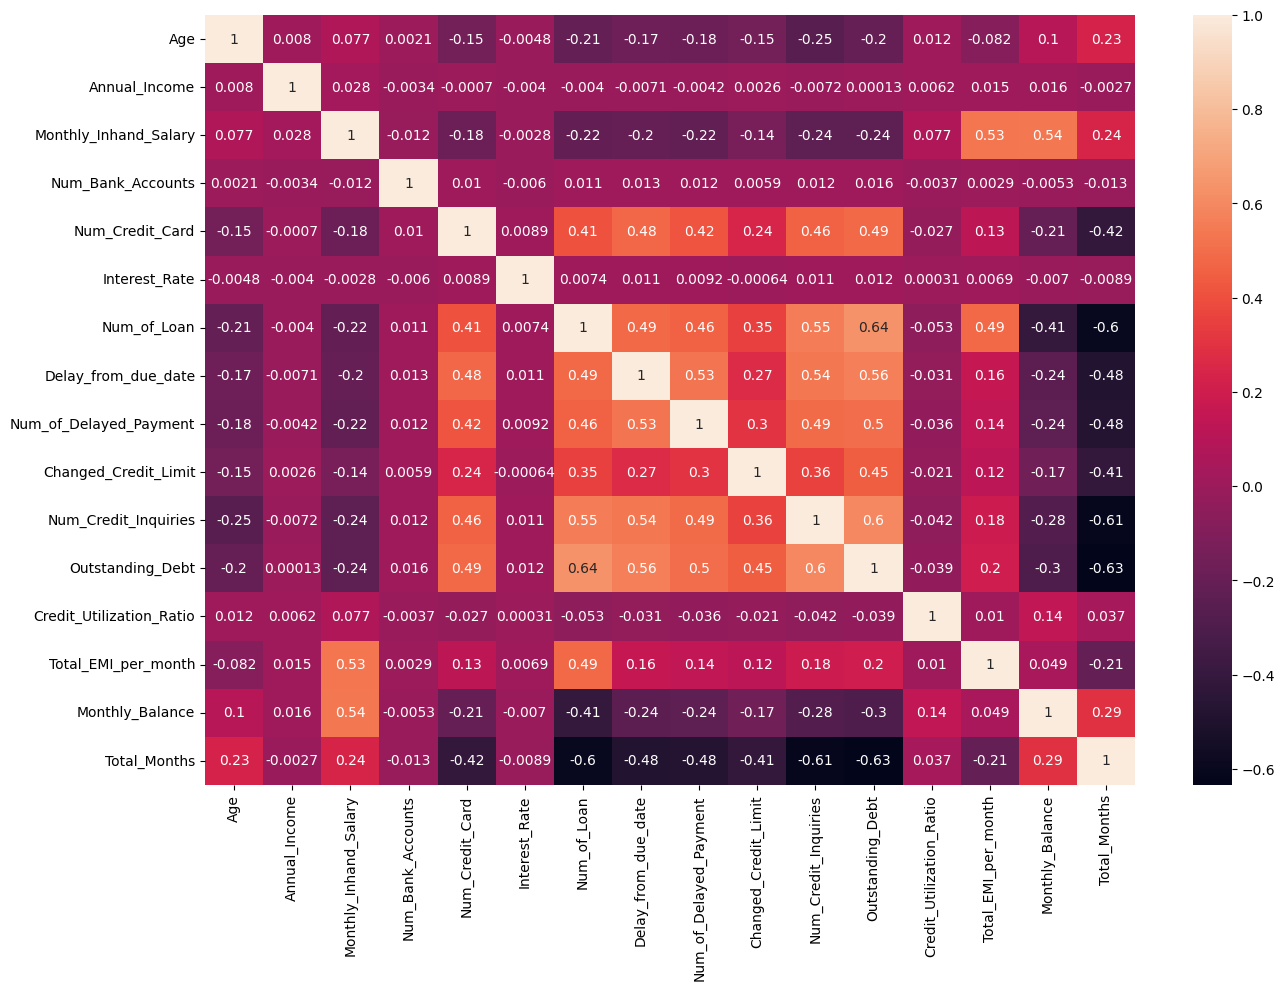

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True)

## Since we want to see the correlation matrix including the categorical variables also, which are encoded as objects, we should map them to numerical values to perform the correlation analysis and use them for grouping and imputation.#

In [ ]:
# Select non-numerical columns
non_numerical_cols = df.select_dtypes(include=["object"]).columns

# Print the non-numerical columns
print(non_numerical_cols)


Index(['Customer_ID', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


## Mapping categorical variables in numerical variables

In [ ]:
# Define the mapping for the Credit_Mix column
credit_map = {"Good": 3, "Standard": 2, "Bad": 1}  # Scale to reflect ordinal nature
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [ ]:
def convert_payment_behaviour(value):
    value = value.replace('Lowspent', 'Low_spent_').replace('Highspent', 'High_spent_')
    value = value.replace('Smallvaluepayments', 'Small_value_payments')
    value = value.replace('Mediumvaluepayments', 'Medium_value_payments')
    value = value.replace('Largevaluepayments', 'Large_value_payments')
    return value

# Apply the function to the 'Payment_Behaviour' column
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(convert_payment_behaviour)


In [ ]:
pay_map = {"Yes": 3, "No": 1, "NM": 2}  # Adjusted to reflect positive and negative behaviors
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

category_ranking = {
    'High_spent_Large_value_payments': 1,
    'High_spent_Medium_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'Low_spent_Large_value_payments': 4,
    'Low_spent_Medium_value_payments': 5,
    'Low_spent_Small_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_ranking)

In [ ]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
6,21574
2,12895
5,10963
3,9032
4,8436
1,7786


In [ ]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)  # Filling missing values

<ipython-input-98-94616612fcd0>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Occupation'] = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)  # Filling missing values


In [ ]:
df['Occupation'].dtype #checking data type

dtype('O')

**Transforming Type of Loan in numeric**

In [ ]:
# Calculate the correlation matrix
df_without_strings = df.drop(columns=['Occupation', "Customer_ID", "Credit_Score"]) #dropping occupation since it's a string type

# Calculate the correlation matrix without 'Occupation'
correlation_matrix = df_without_strings.corr()

# Identify the variable with the highest correlation with 'Num_of_Delayed_Payment'
high_corr_var = correlation_matrix['Num_of_Delayed_Payment'].sort_values(ascending=False).index[1]  # Index [1] to skip self-correlation

print(f"Variable with highest correlation to 'Num_of_Delayed_Payment': {high_corr_var}")

Variable with highest correlation to 'Num_of_Delayed_Payment': Payment_of_Min_Amount


In [ ]:
#Since Credit Mix has a lot of missing values, we are going to try with the second most correlated variable
high_corr_var_2 = correlation_matrix['Num_of_Delayed_Payment'].sort_values(ascending=False).index[2]  # Index [2]

print(f"Variable with second highest correlation to 'Num_of_Delayed_Payment': {high_corr_var_2}")

Variable with second highest correlation to 'Num_of_Delayed_Payment': Delay_from_due_date


In [ ]:
df['Delay_from_due_date'].isna().sum()

0

In [ ]:
# Group by the highly correlated variable and calculate the median for 'Num_of_Delayed_Payment' within each group
median_by_group = df.groupby('Delay_from_due_date')['Num_of_Delayed_Payment'].transform('median')

# Fill NaN values in 'Num_of_Delayed_Payment' with the median for each group
df['Num_of_Delayed_Payment'].fillna(median_by_group, inplace=True)

# Check the result
print(df['Num_of_Delayed_Payment'].isna().sum())

0


We do the same for the number of credit inquiries

In [ ]:
high_corr_var_num_credit_inquiries = correlation_matrix['Num_Credit_Inquiries'].sort_values(ascending=False).index[1]  # Index [1] to skip self-correlation

print(f"Variable with highest correlation to 'Num_Credit_Inquiries': {high_corr_var_num_credit_inquiries}")

high_corr_var_num_credit_inquiries = correlation_matrix['Num_Credit_Inquiries'].sort_values(ascending=False).index[2]

print(f"Variable with second highest correlation to 'Num_Credit_Inquiries': {high_corr_var_num_credit_inquiries}")

Variable with highest correlation to 'Num_Credit_Inquiries': Outstanding_Debt
Variable with second highest correlation to 'Num_Credit_Inquiries': Payment_of_Min_Amount


In [ ]:
# Group by the highly correlated variable and calculate the median for 'Num_of_Delayed_Payment' within each group
median_by_group_inq = df.groupby('Outstanding_Debt')['Num_Credit_Inquiries'].transform('median')

# Fill NaN values in 'Num_of_Delayed_Payment' with the median for each group
df['Num_Credit_Inquiries'].fillna(median_by_group_inq, inplace=True)

# Check the result
print(df['Num_Credit_Inquiries'].isna().sum())

0


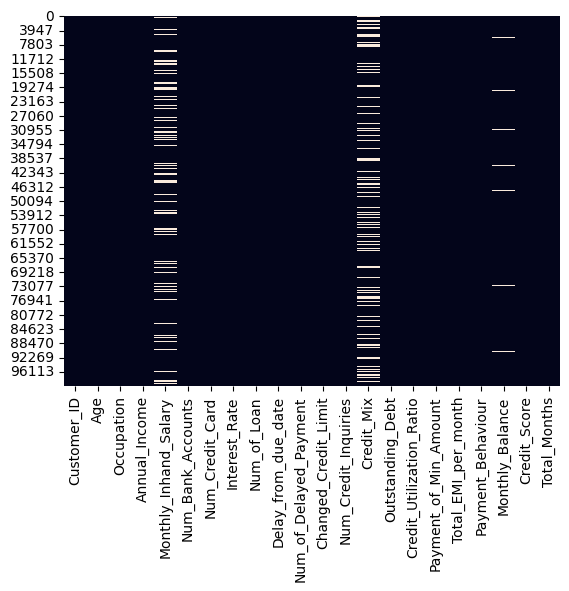

In [ ]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [ ]:
#counting missing values
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,27
Annual_Income,0
Monthly_Inhand_Salary,10528
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [ ]:
df['Credit_Mix'].unique()

array([nan,  3.,  2.,  1.])

In [ ]:
print(df['Credit_Mix'].dtype)


float64


In [ ]:
df['Credit_Mix'].unique()

array([nan,  3.,  2.,  1.])

Imputing Values for the credit history age in total month. First we check the distribution of Total_month to see if would be prefereble to fill the values with the median or the mean.

In [ ]:
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,27
Annual_Income,0
Monthly_Inhand_Salary,10528
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


<Axes: ylabel='Total_Months'>

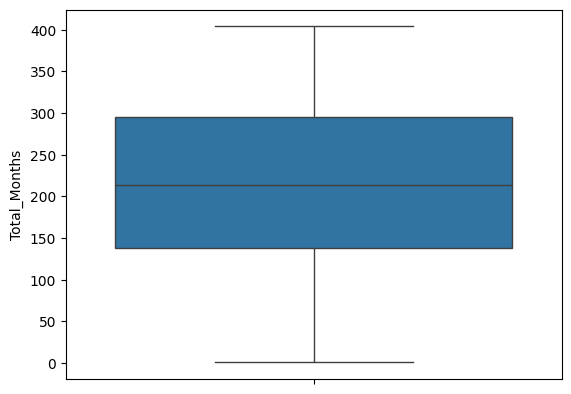

In [ ]:
sns.boxplot(df['Total_Months'])

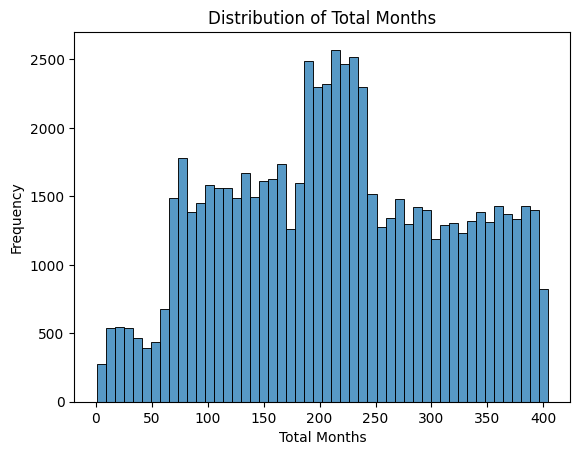

In [ ]:
# Create a histogram of total months
sns.histplot(data=df, x="Total_Months", bins=50)

# Add title and labels
plt.title("Distribution of Total Months")
plt.xlabel("Total Months")
plt.ylabel("Frequency")

# Show the plot
plt.show()


The distribution of 'Total Months' appears to be negatively skewed, thus using the median to fill NaN values might be a more robust choice since it is less affected by skewness and outliers.

In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()

0

In [ ]:
df['Monthly_Balance'].isna().sum()

635

In [ ]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-116-23688a7b9b60>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


# Before using the KNN imputer to impute the missing values for Credit Mix, We round the numerical variables to the second decimal place and transform the variable into numerical trough mapping it.

In [ ]:
def round_to_two_decimals(value):
    """
    Rounds a given value to two decimal places.

    Parameters:
    value (float): The value to be rounded.

    Returns:
    float: The value rounded to two decimal places.
    """
    return round(value, 2)

In [ ]:
# List of columns to round to two decimal places
columns_to_round = [
    'Total_EMI_per_month', 'Annual_Income', 'Monthly_Balance', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit'
]

In [ ]:
df['Num_Credit_Card'].head()

,Num_Credit_Card
0,4.0
2,4.0
3,4.0
4,4.0
6,4.0


In [ ]:
for column in columns_to_round:
    df[column] = df[column].apply(round_to_two_decimals)

# **KNN Algorithm**

In [ ]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
2.0,26831
3.0,15118
1.0,14417


In [ ]:
def get_numerical_df(df):
    """
    Extract only the numerical columns from a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A DataFrame containing only the numerical columns.
    """
    # Select only the numerical columns
    numerical_df = df.select_dtypes(include=['number'])

    return numerical_df

In [ ]:
numerical_df = get_numerical_df(df) #getting only numerical columns

In [ ]:
from sklearn.impute import KNNImputer

def knn_impute_specific_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation based on all numerical columns,
    ensuring that the imputed values for a categorical column only include the original categorical values.

    Parameters:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with the specified column imputed.
    """

    # Store original non-missing values
    original_values = df[column_name].copy()

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the numerical columns
    numerical_df_imputed = imputer.fit_transform(numerical_df)

    # Convert the result back to a DataFrame
    numerical_df_imputed = pd.DataFrame(numerical_df_imputed, columns=numerical_df.columns)

    # Get the imputed column values
    imputed_column = numerical_df_imputed[column_name]

    # Round the imputed values to the nearest valid category (1, 2, or 3)
    imputed_column_rounded = imputed_column.round().clip(1, 3)

    # Only update missing values in the original DataFrame
    df[column_name] = original_values.combine_first(imputed_column_rounded)

    return df

In [ ]:
df.dropna(subset=["Occupation"], inplace=True)

In [ ]:
imputed_df = knn_impute_specific_column(df, 'Monthly_Inhand_Salary', n_neighbors=10)

In [ ]:
imputed_df = knn_impute_specific_column(df, 'Monthly_Balance', n_neighbors=10)

In [ ]:
imputed_df = knn_impute_specific_column(df, 'Credit_Mix', n_neighbors=10)

In [ ]:
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,18
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [ ]:
df['Credit_Mix'].unique()

array([2., 3., 1.])

In [ ]:
df['Credit_Mix'].value_counts() #checking the distribution after imputation

,count
Credit_Mix,
2.0,31684
3.0,17720
1.0,16904


In [ ]:
df.head(5)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Total_Months
0,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4.0,3,...,4.0,2.0,809.98,26.82,1,49.57,3,312.49,Good,265.0
2,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4.0,3,...,4.0,3.0,809.98,28.61,1,49.57,5,331.21,Good,267.0
3,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4.0,5,...,4.0,3.0,809.98,31.38,1,49.57,6,223.45,Good,268.0
4,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4.0,6,...,4.0,3.0,809.98,24.80,1,49.57,2,341.49,Good,269.0
6,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4.0,3,...,4.0,3.0,809.98,22.54,1,49.57,6,244.57,Good,271.0


Annual Income

### Classification Analysis with decision tree

To use a combined dataset of both training and test data when implementing a Decision Tree algorithm, the typical approach is to follow these steps:

Combine the training and test data: You concatenate the training and test sets into one dataset to allow you to apply preprocessing steps consistently across both datasets.

Apply preprocessing (encoding, scaling, etc.): Process categorical variables, handle missing data, and scale the features in the combined dataset so the transformations are consistent across both the training and test sets.

Split the combined dataset back into training and test sets: After preprocessing, separate the combined dataset into training and test sets again.

## To impruve the model, we first create new features and then we  aggregate monthly data to customer level

Importing Cleaned Test Dataset

In [ ]:
test_df = pd.read_csv("test_df.csv")

#New Features:#

In [ ]:
df['EMI_to_Income_Ratio'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary']
test_df['EMI_to_Income_Ratio'] = test_df['Total_EMI_per_month'] / test_df['Monthly_Inhand_Salary']

In [ ]:
# Calculate a combined metric for New Credit
df['New_Credit'] = (df['Num_Credit_Inquiries'] + df['Changed_Credit_Limit'] + df['Num_of_Loan']) / 3
test_df['New_Credit'] = (test_df['Num_Credit_Inquiries'] + test_df['Changed_Credit_Limit'] + test_df['Num_of_Loan']) / 3

In [ ]:
# Calculate a combined metric for Outstanding_Debt and Credit_Utilization_Ratio
df['Debt_Utilization'] = (df['Outstanding_Debt'] + df['Credit_Utilization_Ratio']) / 2
test_df['Debt_Utilization'] = (test_df['Outstanding_Debt'] + test_df['Credit_Utilization_Ratio']) / 2

Defining Age groups

In [ ]:
# Age groups definition based on data distribution
bins = [14, 25, 35, 45, 55, 65, 75, 95]
labels = ['14-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-100']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
test_df['Age_Group'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66308 entries, 0 to 99998
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               66308 non-null  object  
 1   Age                       66308 non-null  float64 
 2   Occupation                66308 non-null  object  
 3   Annual_Income             66308 non-null  float64 
 4   Monthly_Inhand_Salary     66308 non-null  float64 
 5   Num_Bank_Accounts         66308 non-null  int64   
 6   Num_Credit_Card           66308 non-null  float64 
 7   Interest_Rate             66308 non-null  int64   
 8   Num_of_Loan               66308 non-null  float64 
 9   Delay_from_due_date       66308 non-null  int64   
 10  Num_of_Delayed_Payment    66308 non-null  float64 
 11  Changed_Credit_Limit      66308 non-null  float64 
 12  Num_Credit_Inquiries      66308 non-null  float64 
 13  Credit_Mix                66308 non-null  float64 


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34471 entries, 0 to 34470
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               34471 non-null  object  
 1   Age                       34471 non-null  float64 
 2   Occupation                34395 non-null  object  
 3   Annual_Income             34471 non-null  float64 
 4   Monthly_Inhand_Salary     34243 non-null  float64 
 5   Num_Bank_Accounts         34471 non-null  int64   
 6   Num_Credit_Card           34471 non-null  float64 
 7   Interest_Rate             34471 non-null  int64   
 8   Num_of_Loan               34471 non-null  int64   
 9   Delay_from_due_date       34471 non-null  int64   
 10  Num_of_Delayed_Payment    34471 non-null  float64 
 11  Changed_Credit_Limit      34471 non-null  float64 
 12  Num_Credit_Inquiries      34471 non-null  float64 
 13  Credit_Mix                34471 non-null  floa

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100779 entries, 0 to 100778
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100779 non-null  object  
 1   Age                       100779 non-null  float64 
 2   Occupation                100703 non-null  object  
 3   Annual_Income             100779 non-null  float64 
 4   Monthly_Inhand_Salary     100551 non-null  float64 
 5   Num_Bank_Accounts         100779 non-null  int64   
 6   Num_Credit_Card           100779 non-null  float64 
 7   Interest_Rate             100779 non-null  int64   
 8   Num_of_Loan               100779 non-null  float64 
 9   Delay_from_due_date       100779 non-null  int64   
 10  Num_of_Delayed_Payment    100779 non-null  float64 
 11  Changed_Credit_Limit      100779 non-null  float64 
 12  Num_Credit_Inquiries      100779 non-null  float64 
 13  Credit_Mix                100

# We are going to train the Decision Tree model on the entire training dataset (X_train_combined) and evaluate it on the test dataset (X_test_combined)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# 1. Loading train and test datasets
df_train = df.copy()
test_df = pd.read_csv("test_df.csv")

# Add a column to identify test vs. train dataset
df_train['dataset'] = 'train'
test_df['dataset'] = 'test'

# Concatenate the two datasets
combined_df = pd.concat([df_train, test_df], ignore_index=True)

# Encode the target in the training set, but keep test target as NaN
label_encoder = LabelEncoder()
combined_df['Credit_Score'] = label_encoder.fit_transform(combined_df['Credit_Score'].fillna('Unknown'))

## 3. Identify categorical columns that need to be encoded
categorical_cols = combined_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('dataset')  # 'dataset' column should not be encoded
# 'Customer_ID' should also not be encoded
categorical_cols.remove('Customer_ID')

# Ensure 'Age_Group' is included in the categorical columns to be encoded
categorical_cols.append('Age_Group')

# Define feature columns (excluding irrelevant ones like 'Customer_ID' and the 'dataset' column)
feature_cols = [col for col in combined_df.columns if col not in ['Customer_ID', 'Credit_Score', 'dataset']]

# One-Hot Encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

# 3. Preprocess the combined dataset
combined_processed = preprocessor.fit_transform(combined_df[feature_cols])

# Scale the features
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_processed)

# 4. Split the data back into train and test sets
X_train_combined = combined_scaled[combined_df['dataset'] == 'train']
y_train_combined = combined_df.loc[combined_df['dataset'] == 'train', 'Credit_Score']

X_test_combined = combined_scaled[combined_df['dataset'] == 'test']

# 5. Train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_combined, y_train_combined)

# 6. Make predictions on the test dataset
test_predictions = dtree.predict(X_test_combined)

# Convert numerical labels back to original categories
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Add predictions to the test dataset
test_df['Predicted_Credit_Score'] = test_predictions_labels

# Display the predictions
print(test_df[['Customer_ID', 'Predicted_Credit_Score']].head())

  Customer_ID Predicted_Credit_Score
0    CUS0xd40                   Good
1    CUS0xd40                   Good
2    CUS0xd40                   Good
3   CUS0x21b1               Standard
4   CUS0x21b1               Standard


In [ ]:
test_df.head(10)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Total_Months,dataset,Predicted_Credit_Score
0,CUS0xd40,23.0,Scientist,19114.12,1824.84,3,4.0,3,4,3,...,3.0,809.98,35.03,1,49.57,6,186.27,273.0,test,Good
1,CUS0xd40,24.0,Scientist,19114.12,1824.84,3,4.0,3,4,3,...,3.0,809.98,33.05,1,49.57,2,361.44,274.0,test,Good
2,CUS0xd40,24.0,Scientist,19114.12,1824.84,3,4.0,3,4,4,...,3.0,809.98,32.43,1,49.57,2,343.83,276.0,test,Good
3,CUS0x21b1,28.0,Teacher,34847.84,3037.99,2,4.0,6,1,3,...,3.0,605.03,25.93,1,18.82,1,485.30,327.0,test,Standard
4,CUS0x21b1,28.0,Teacher,34847.84,3037.99,2,4.0,6,1,3,...,3.0,605.03,30.12,1,18.82,4,303.36,328.0,test,Standard
5,CUS0x21b1,28.0,Teacher,34847.84,3037.99,2,4.0,6,1,3,...,2.0,605.03,31.00,1,18.82,1,452.30,329.0,test,Good
6,CUS0x21b1,28.0,Teacher,34847.84,3037.99,2,4.0,6,1,3,...,3.0,605.03,33.88,1,18.82,6,421.45,330.0,test,Standard
7,CUS0xb891,55.0,Entrepreneur,30689.89,2612.49,2,5.0,4,1,5,...,3.0,632.46,39.38,1,16.42,2,425.73,215.0,test,Standard
8,CUS0xb891,55.0,Entrepreneur,30689.89,2612.49,2,5.0,4,1,5,...,3.0,632.46,36.82,1,16.42,5,332.95,217.0,test,Standard
9,CUS0xb891,55.0,Entrepreneur,4148862.00,2612.49,2,5.0,4,1,6,...,3.0,632.46,35.58,1,16.42,6,300.90,218.0,test,Standard


Implement cross-validatio: This method will split the training data into k folds (typically 5 or 10), train the model on k-1 folds, and evaluate it on the remaining fold. The process is repeated k times, each time using a different fold for evaluation.

In [ ]:
from sklearn.model_selection import cross_val_score

# 1. Train the Decision Tree model with cross-validation
# Perform 5-fold cross-validation on the training dataset
cv_scores = cross_val_score(dtree, X_train_combined, y_train_combined, cv=5)

# 2. Print cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.59387724 0.60292565 0.58935304 0.60168916 0.58615489]
Average Cross-Validation Score: 0.59


An average cross-validation score of 0.59 indicates that the model correctly predicts the credit score classification about 59% of the time. This suggests that there is room for improvement, as a higher score would be preferable.

Cross-validation is a technique applied only on the training dataset, which contains both the features and the target variable (in your case, the Credit_Score). The test dataset, which lacks the Credit_Score, is used only for making predictions after the model is fully trained and validated.

Visualizing the confusion matrix

To calculate the confusion matrix, you'll need both the true labels and the predicted labels for a validation set or test set that contains actual target values (Credit_Score). Since you don't have true labels for the test_df (which you're using only for prediction), you'll need to calculate the confusion matrix on the training data or use a validation set by splitting the training data.
Steps:
Split the training data into training and validation sets.
Train the model on the training subset.
Use the validation subset to make predictions.
Compare the predicted values with the actual values of the validation set to calculate the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

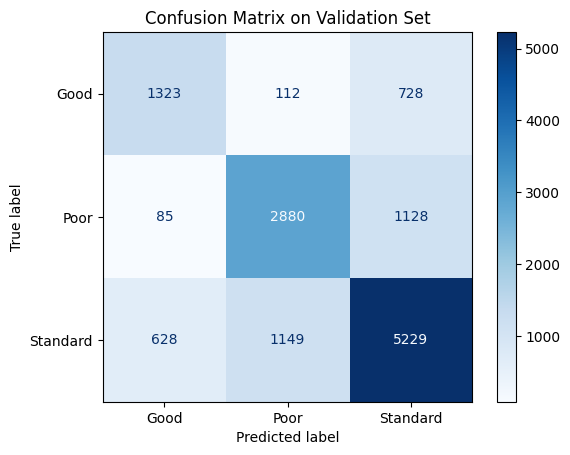

[[1323  112  728]
 [  85 2880 1128]
 [ 628 1149 5229]]


In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=123)

# Train the Decision Tree model on the training subset
dtree.fit(X_train, y_train)

# Make predictions on the validation subset
y_val_predictions = dtree.predict(X_val)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_predictions)

# Get the unique class labels from both y_val and predictions
unique_labels = label_encoder.inverse_transform(sorted(set(y_val) | set(y_val_predictions)))

# Display the confusion matrix with correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Validation Set')
plt.show()

# Print the confusion matrix as an array
print(cm)
